In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Cleaning data dengan mengganti nilai 0 (missing value) dengan rata-rata kolom karena merupakan data yang tidak valid (imputasi nilai dengan teknik mean)

In [5]:
# Replacing zero values with NaN
# Replace NaN with mean
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
# split dataset
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

# Splitting X and Y
#data test yang diambil 20%, data train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = df['Outcome'])

In [8]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

614
614
154
154


KNN Classifier

In [9]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=1, p=2,metric='euclidean')

In [10]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [11]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [12]:
#nilai akurasi
print(accuracy_score(y_pred,y_test))

0.6753246753246753


In [13]:
train_scores=[]
test_scores=[]

for i in range(1,21):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [14]:
## score that comes from testing on the same datapoints that were used for training
max_train_score=max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [15]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 71.42857142857143 % and k = [20]


Visualisasi

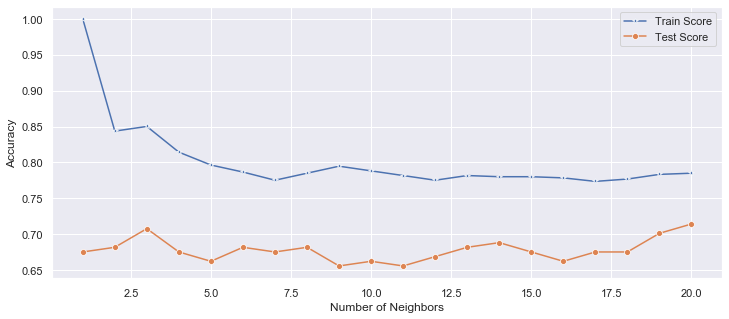

In [16]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,21),train_scores,marker='*',label='Train Score')
p=sns.lineplot(range(1,21),test_scores,marker='o',label='Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [17]:
#The best result is captured at k = 20 hence 20 is used for the final model
knn=KNeighborsClassifier(n_neighbors=20, p=2,metric='euclidean')

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7142857142857143

In [18]:
#Model Performance Analysis
#Confusion Matrix

y_pred=knn.predict(X_test)
confusion_matrix(y_pred,y_test)
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,82,18,100
1,26,28,54
All,108,46,154


=>Total data test: 154 (20% dari total data)
1. Frekuensi prediksi pasien yang diprediksi yang tidak diagnosa mengidap penyakit diabetes (0) dan sesuai dengan data aktual pasien yang tidak mengidap penyakit diabetes (0) sebanyak 82 orang. Keadaan seperti ini disebut sebagai “True Positive”.

2. Frekuensi prediksi pasien yang diprediksi yang tidak diagnosa mengidap penyakit diabetes (0), namun pada data aktual menunjukan pasien yang mengidap penyakit diabetes (1) sebanyak 18 orang. Kasus Keadaan seperti ini disebut sebagai “False positive”.

3. Frekuensi prediksi pasien yang diprediksi yang diagnosa mengidap penyakit diabetes (1), namun pada data aktual menunjukkan pasien yang tidak mengidap penyakit diabetes (0) sebanyak 26 orang. Keadaan seperti ini disebut sebagai “False Negative”.

4. Frekuensi prediksi pasien yang diprediksi yang diagnosa mengidap penyakit diabetes (1) dan sesuai dengan data aktual menunjukan pasien yang mengidap penyakit diabetes (1) adalah sebanyak 28 orang. Keadaan seperti ini disebut sebagai “True Negative”.

In [20]:
#classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       108
           1       0.52      0.61      0.56        46

    accuracy                           0.71       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.71      0.72       154



In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [22]:
#input untuk prediksi
hasil = knn.predict([[3,150,75,36,68,44.6,1.543,26]])
hasil

array([0], dtype=int64)

1 = Diabetes
0 = tidak